<a href="https://colab.research.google.com/github/Malbasahi/unemployment_Analysis/blob/main/unemployment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import STL

In [33]:
unemployment_rate = pd.read_csv('/content/Unemployment in India.csv')
unemployment_in_india = pd.read_csv('/content/Unemployment_Rate_upto_11_2020.csv')

In [34]:
unemployment_rate

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
unemployment_in_india

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.740
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.740
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.740
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.740
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.740
...,...,...,...,...,...,...,...,...,...
262,West Bengal,30-06-2020,M,7.29,30726310,40.39,East,22.9868,87.855
263,West Bengal,31-07-2020,M,6.83,35372506,46.17,East,22.9868,87.855
264,West Bengal,31-08-2020,M,14.87,33298644,47.48,East,22.9868,87.855
265,West Bengal,30-09-2020,M,9.35,35707239,47.73,East,22.9868,87.855


In [36]:
# Display the first few rows of the dataframes
print(unemployment_rate.head())
print(unemployment_in_india.head())

# Check for missing values
print(unemployment_rate.isnull().sum())
print(unemployment_in_india.isnull().sum())

           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-05-2019    Monthly                              3.65   
1  Andhra Pradesh   30-06-2019    Monthly                              3.05   
2  Andhra Pradesh   31-07-2019    Monthly                              3.75   
3  Andhra Pradesh   31-08-2019    Monthly                              3.32   
4  Andhra Pradesh   30-09-2019    Monthly                              5.17   

    Estimated Employed   Estimated Labour Participation Rate (%)   Area  
0           11999139.0                                     43.24  Rural  
1           11755881.0                                     42.05  Rural  
2           12086707.0                                     43.50  Rural  
3           12285693.0                                     43.97  Rural  
4           12256762.0                                     44.68  Rural  
           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0 

In [37]:
# Drop rows with missing 'Region' values
unemployment_rate.dropna(subset=['Region'], inplace=True)

# Remove leading and trailing spaces from column names
unemployment_rate.columns = unemployment_rate.columns.str.strip()
unemployment_in_india.columns = unemployment_in_india.columns.str.strip()

# Remove leading spaces from the 'Date' column
unemployment_rate['Date'] = unemployment_rate['Date'].str.strip()

# Convert the 'Date' column to datetime objects
unemployment_rate['Date'] = pd.to_datetime(unemployment_rate['Date'], format='%d-%m-%Y')

# Set 'Date' as the index
unemployment_rate.set_index('Date', inplace=True)
unemployment_in_india.set_index('Date', inplace=True)

In [73]:
unemployment_rate.dropna(inplace=True)  # Remove rows with missing values

In [74]:
unemployment_rate['Estimated Employed'] = unemployment_rate['Estimated Employed'].astype(int)

In [75]:
unemployment_rate = pd.get_dummies(unemployment_rate, columns=['Area'])

In [80]:
unemployment_rate.index = pd.to_datetime(unemployment_rate.index, format='%Y-%m-%d')
unemployment_rate['Year'] = unemployment_rate.index.year

In [77]:
merged_data = pd.merge(unemployment_in_india, unemployment_rate, on=['Region', 'Date'], how='inner')

<ipython-input-81-f0c189a1d515>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  unemployment_by_state = unemployment_in_india.groupby('Region').mean()


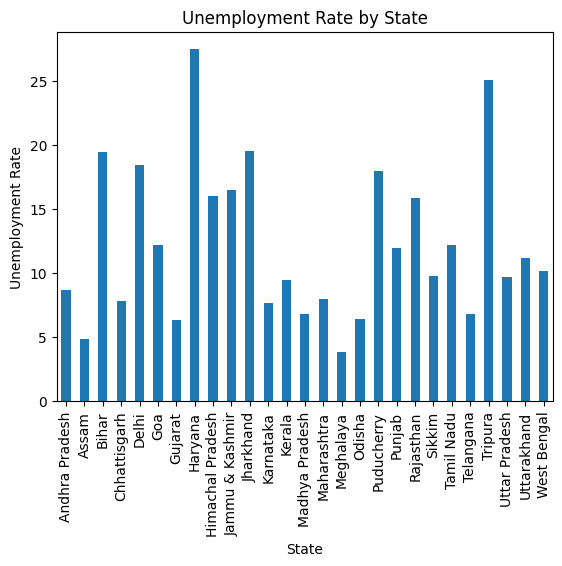

In [81]:
# Grouping by relevant columns and aggregating data
unemployment_by_state = unemployment_in_india.groupby('Region').mean()

# Plotting unemployment rate by state
unemployment_by_state['Estimated Unemployment Rate (%)'].plot(kind='bar')
plt.title('Unemployment Rate by State')
plt.xlabel('State')
plt.ylabel('Unemployment Rate')
plt.show()

In [82]:
# Summary statistics for unemployment rate
print(unemployment_rate.describe())

       Estimated Unemployment Rate (%)  Estimated Employed  \
count                       740.000000        7.400000e+02   
mean                         11.787946        7.204460e+06   
std                          10.721298        8.087988e+06   
min                           0.000000        4.942000e+04   
25%                           4.657500        1.190404e+06   
50%                           8.350000        4.744178e+06   
75%                          15.887500        1.127549e+07   
max                          76.740000        4.577751e+07   

       Estimated Labour Participation Rate (%)         Year  Area_Rural  \
count                               740.000000   740.000000  740.000000   
mean                                 42.630122  2019.418919    0.485135   
std                                   8.111094     0.493716    0.500117   
min                                  13.330000  2019.000000    0.000000   
25%                                  38.062500  2019.000000    0.0

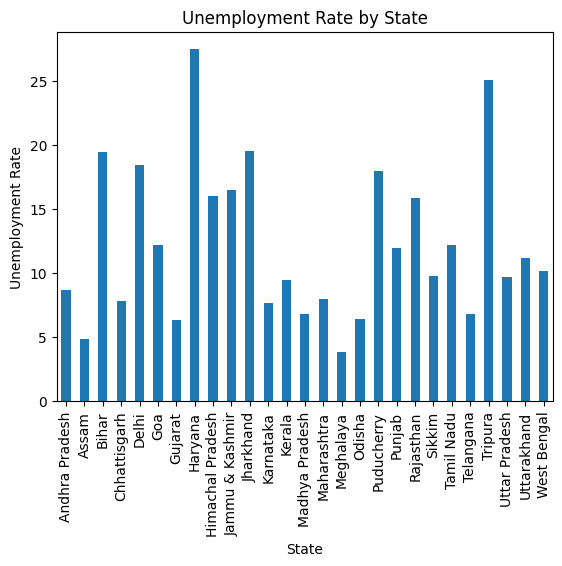

In [83]:
# Plotting unemployment rate by state
unemployment_by_state['Estimated Unemployment Rate (%)'].plot(kind='bar')
plt.title('Unemployment Rate by State')
plt.xlabel('State')
plt.ylabel('Unemployment Rate')
plt.show()

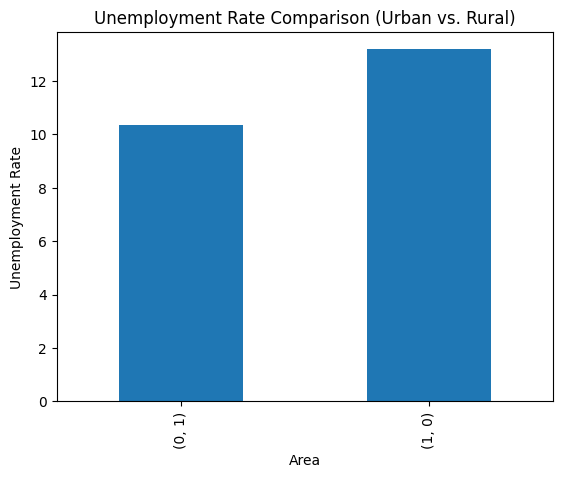

In [85]:
# Grouping by 'Area_Urban' and 'Area_Rural'
unemployment_rate.groupby(['Area_Urban', 'Area_Rural'])['Estimated Unemployment Rate (%)'].mean().plot(kind='bar')
plt.title('Unemployment Rate Comparison (Urban vs. Rural)')
plt.xlabel('Area')
plt.ylabel('Unemployment Rate')
plt.show()

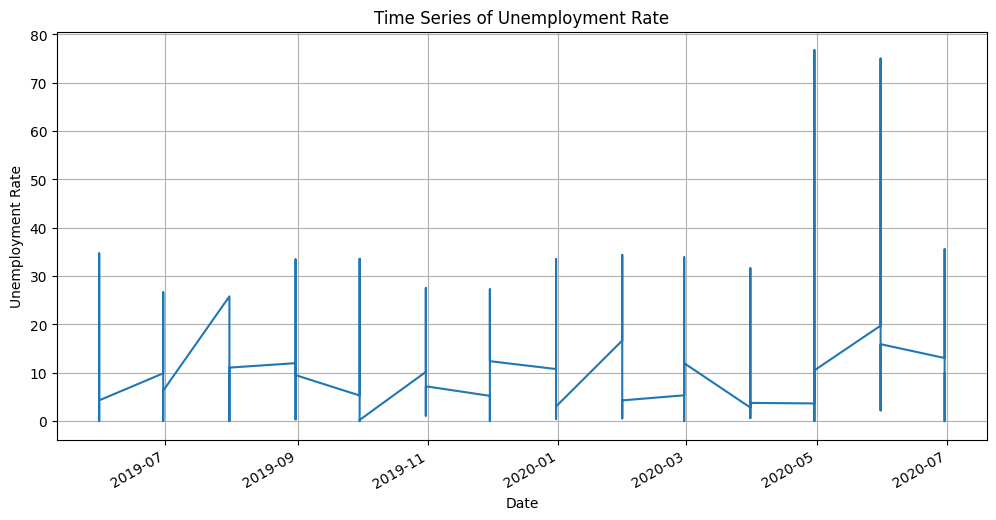

In [86]:
plt.figure(figsize=(12, 6))
unemployment_rate['Estimated Unemployment Rate (%)'].plot()
plt.title('Time Series of Unemployment Rate')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate')
plt.grid(True)
plt.show()

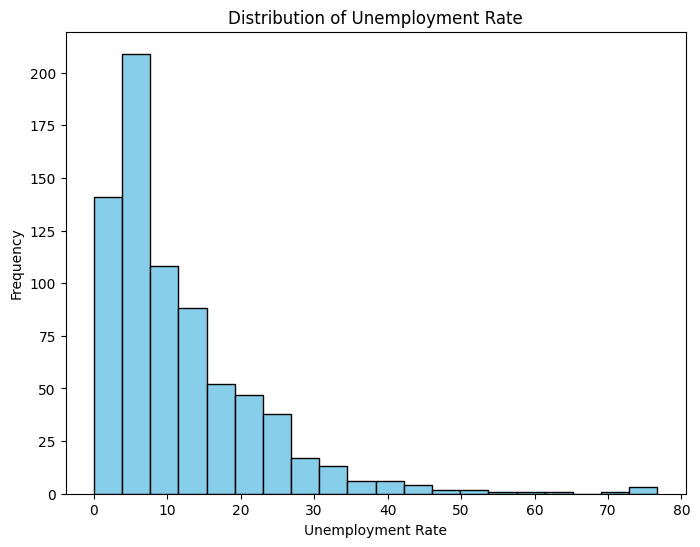

In [87]:
plt.figure(figsize=(8, 6))
plt.hist(unemployment_rate['Estimated Unemployment Rate (%)'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Unemployment Rate')
plt.xlabel('Unemployment Rate')
plt.ylabel('Frequency')
plt.show()

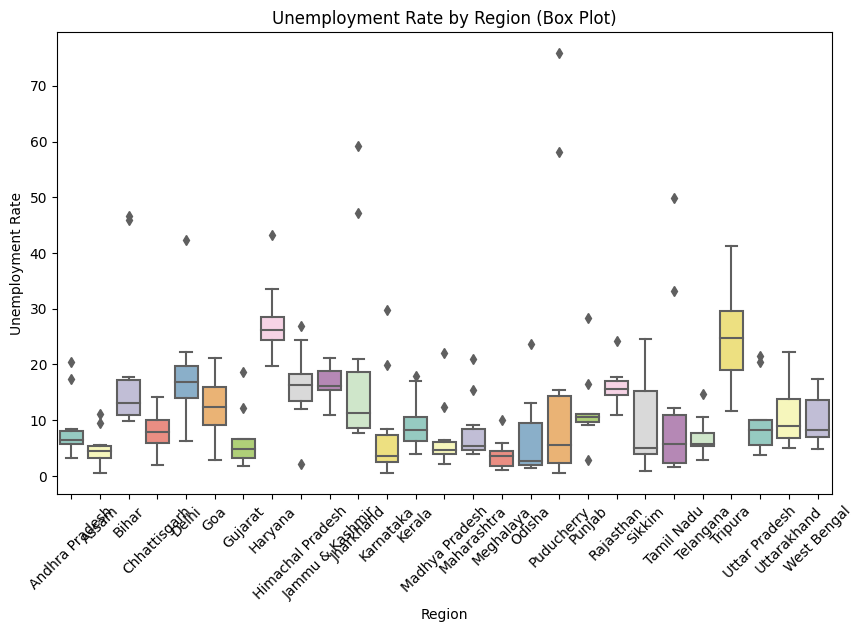

In [88]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Region', y='Estimated Unemployment Rate (%)', data=unemployment_in_india, palette='Set3')
plt.title('Unemployment Rate by Region (Box Plot)')
plt.xlabel('Region')
plt.ylabel('Unemployment Rate')
plt.xticks(rotation=45)
plt.show()

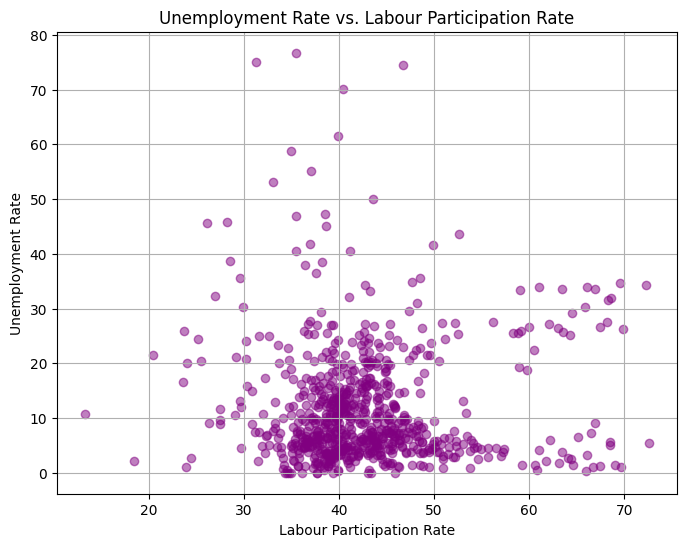

In [89]:
plt.figure(figsize=(8, 6))
plt.scatter(unemployment_rate['Estimated Labour Participation Rate (%)'], unemployment_rate['Estimated Unemployment Rate (%)'], alpha=0.5, color='purple')
plt.title('Unemployment Rate vs. Labour Participation Rate')
plt.xlabel('Labour Participation Rate')
plt.ylabel('Unemployment Rate')
plt.grid(True)
plt.show()

<ipython-input-90-3cbfa3b66027>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = unemployment_rate.corr()


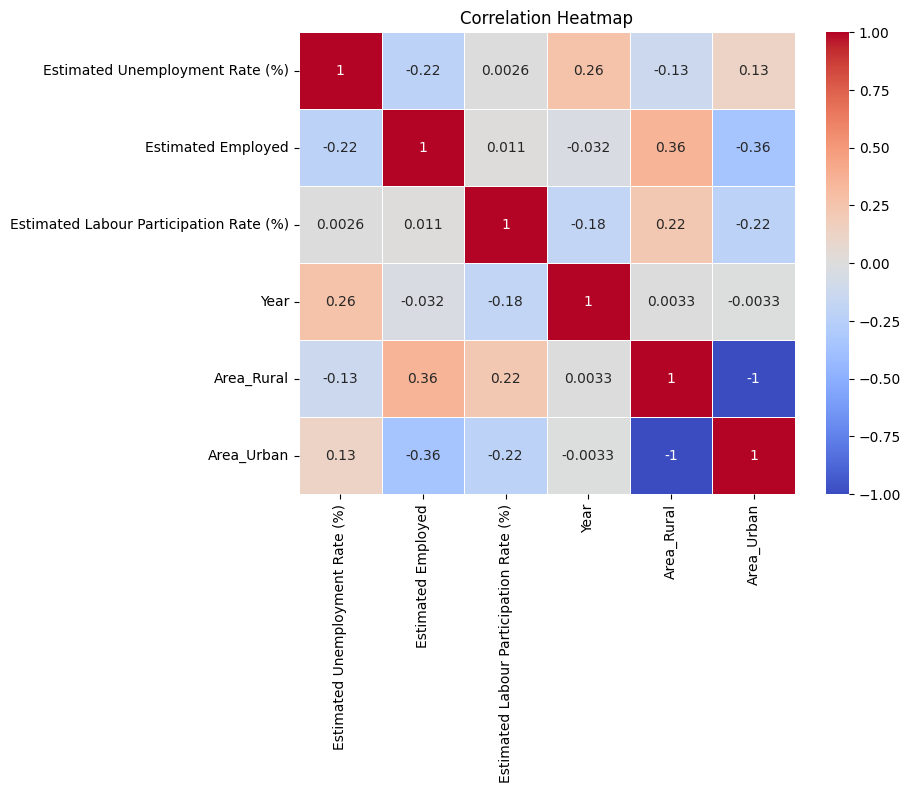

In [90]:
plt.figure(figsize=(8, 6))
correlation_matrix = unemployment_rate.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

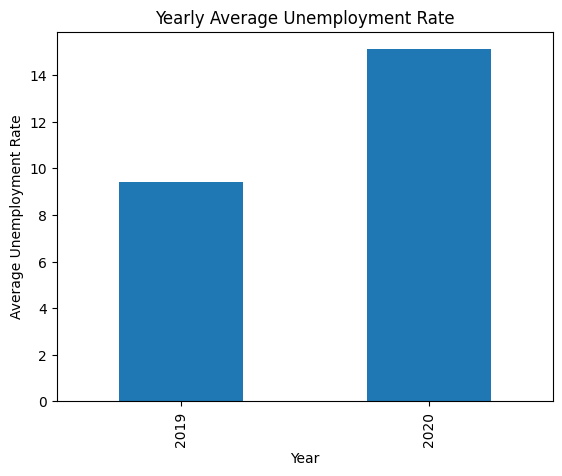

In [91]:
unemployment_rate['Year'] = unemployment_rate.index.year
yearly_averages = unemployment_rate.groupby('Year')['Estimated Unemployment Rate (%)'].mean()
yearly_averages.plot(kind='bar')
plt.title('Yearly Average Unemployment Rate')
plt.xlabel('Year')
plt.ylabel('Average Unemployment Rate')
plt.show()

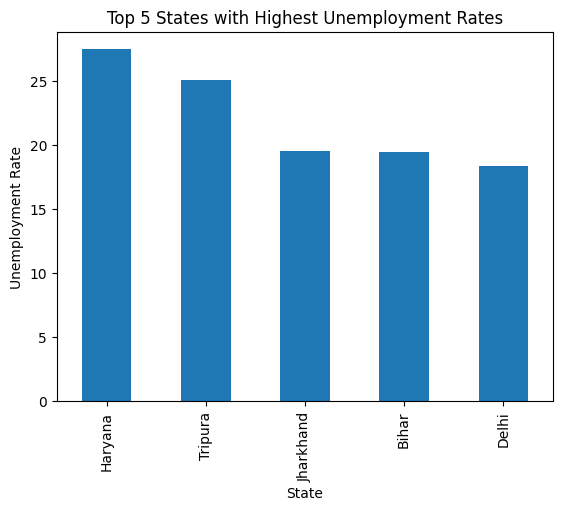

In [92]:
top_states = unemployment_in_india.groupby('Region')['Estimated Unemployment Rate (%)'].mean().nlargest(5)
top_states.plot(kind='bar')
plt.title('Top 5 States with Highest Unemployment Rates')
plt.xlabel('State')
plt.ylabel('Unemployment Rate')
plt.show()

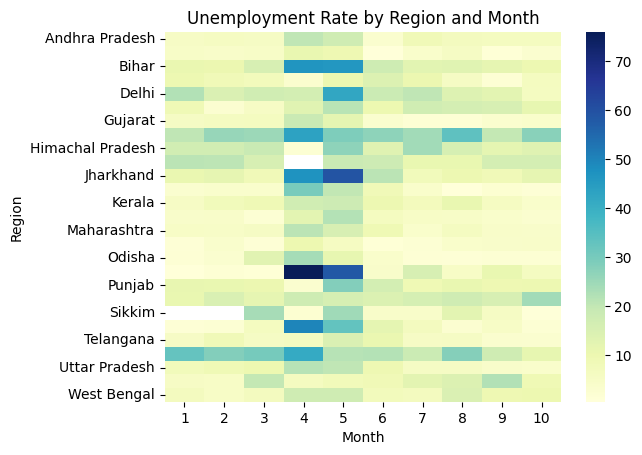

In [94]:
# Create a new column for the month
unemployment_in_india['Month'] = unemployment_in_india.index.month

# Pivot the table to create the heatmap data
heatmap_data = unemployment_in_india.pivot_table(index='Region', columns='Month', values='Estimated Unemployment Rate (%)', aggfunc='mean')

# Create the heatmap
sns.heatmap(heatmap_data, cmap='YlGnBu')
plt.title('Unemployment Rate by Region and Month')
plt.xlabel('Month')
plt.ylabel('Region')
plt.show()

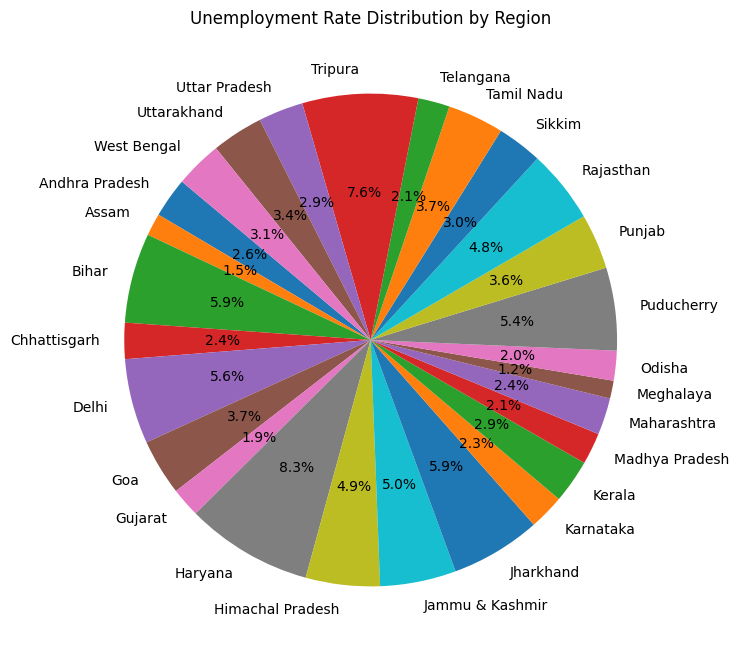

In [95]:
# Calculate the mean unemployment rate by region
region_unemployment = unemployment_in_india.groupby('Region')['Estimated Unemployment Rate (%)'].mean()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(region_unemployment, labels=region_unemployment.index, autopct='%1.1f%%', startangle=140)
plt.title('Unemployment Rate Distribution by Region')
plt.show()

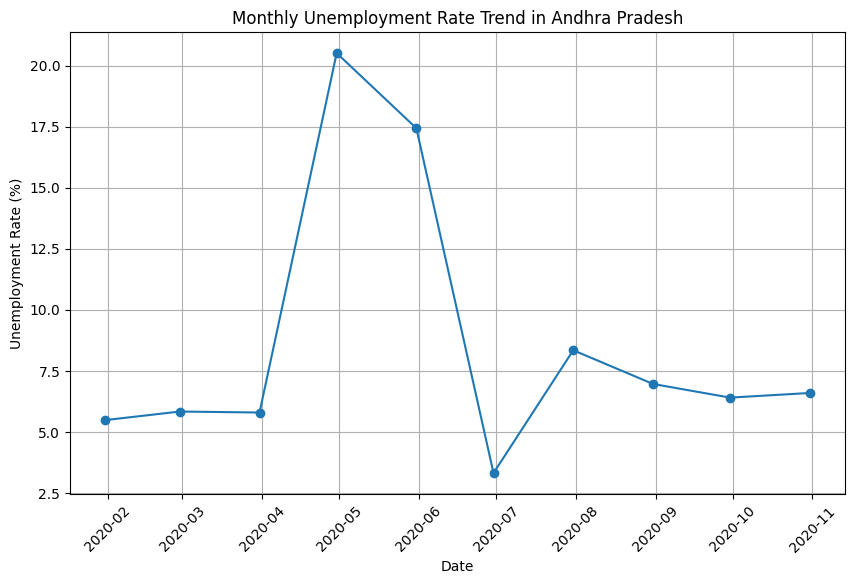

In [96]:
# Choose a specific region (e.g., 'Andhra Pradesh')
region_data = unemployment_in_india[unemployment_in_india['Region'] == 'Andhra Pradesh']

# Create a line chart
plt.figure(figsize=(10, 6))
plt.plot(region_data.index, region_data['Estimated Unemployment Rate (%)'], marker='o')
plt.title('Monthly Unemployment Rate Trend in Andhra Pradesh')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

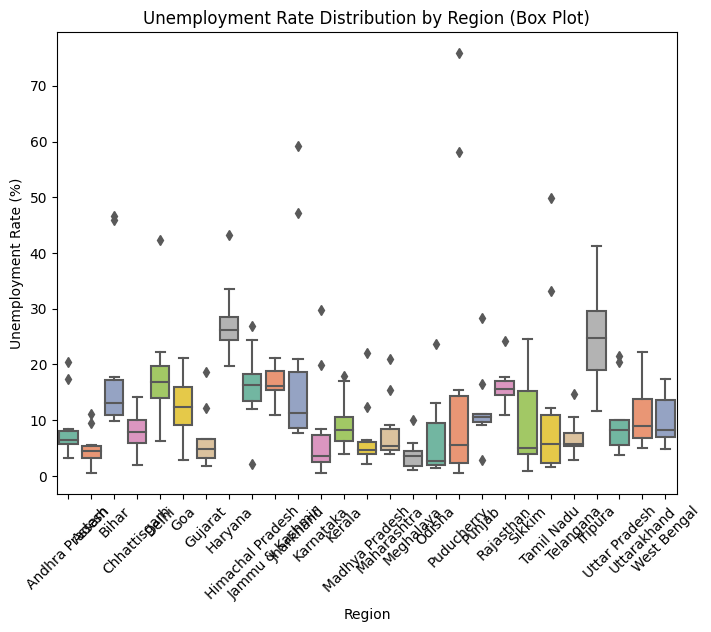

In [97]:
# Create a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Region', y='Estimated Unemployment Rate (%)', data=unemployment_in_india, palette='Set2')
plt.title('Unemployment Rate Distribution by Region (Box Plot)')
plt.xticks(rotation=45)
plt.ylabel('Unemployment Rate (%)')
plt.show()

In [98]:
unemployment_in_india

,Region,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude,Month
Date,,,,,,,,,
2020-01-31,Andhra Pradesh,M,5.48,16635535,41.02,South,15.9129,79.740,1
2020-02-29,Andhra Pradesh,M,5.83,16545652,40.90,South,15.9129,79.740,2
2020-03-31,Andhra Pradesh,M,5.79,15881197,39.18,South,15.9129,79.740,3
2020-04-30,Andhra Pradesh,M,20.51,11336911,33.10,South,15.9129,79.740,4
2020-05-31,Andhra Pradesh,M,17.43,12988845,36.46,South,15.9129,79.740,5
...,...,...,...,...,...,...,...,...,...
2020-06-30,West Bengal,M,7.29,30726310,40.39,East,22.9868,87.855,6
2020-07-31,West Bengal,M,6.83,35372506,46.17,East,22.9868,87.855,7
2020-08-31,West Bengal,M,14.87,33298644,47.48,East,22.9868,87.855,8


In [99]:
unemployment_rate

,Region,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Year,Area_Rural,Area_Urban
Date,,,,,,,,
2019-05-31,Andhra Pradesh,Monthly,3.65,11999139,43.24,2019,1,0
2019-06-30,Andhra Pradesh,Monthly,3.05,11755881,42.05,2019,1,0
2019-07-31,Andhra Pradesh,Monthly,3.75,12086707,43.50,2019,1,0
2019-08-31,Andhra Pradesh,Monthly,3.32,12285693,43.97,2019,1,0
2019-09-30,Andhra Pradesh,Monthly,5.17,12256762,44.68,2019,1,0
...,...,...,...,...,...,...,...,...
2020-02-29,West Bengal,Monthly,7.55,10871168,44.09,2020,0,1
2020-03-31,West Bengal,Monthly,6.67,10806105,43.34,2020,0,1
2020-04-30,West Bengal,Monthly,15.63,9299466,41.20,2020,0,1


In [102]:
# Save the cleaned data to a file
unemployment_rate.to_csv('cleaned_unemployment_rate.csv', index=False)
unemployment_in_india.to_csv('cleaned_unemployment_in_indiaa.csv', index=False)
# Generate a link to download the file
from google.colab import files
files.download('cleaned_unemployment_rate.csv')
files.download('cleaned_unemployment_in_indiaa.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>